In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Loading the dataset
df = pd.read_csv('C:/USERS/YASHN/INSURANCE CLAIM.CSV')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [4]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
# Checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# Checking the dimensions
df.shape

(1000, 40)

In [8]:
# Checking Null Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here, we observe _c39 column has null values.

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

N    753
Y    247
Name: fraud_reported, dtype: int64

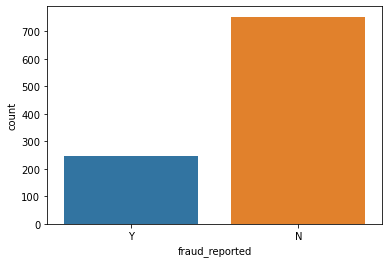

In [11]:
sns.countplot(df['fraud_reported'])
df['fraud_reported'].value_counts()

In [12]:
df.loc[df['collision_type']  == '?' ]
df.loc[df['property_damage']  == '?' ]
df.loc[df['police_report_available'] == '?' ]

months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868       27-06-2006           IN   
6                   137   34         413978       04-06-2000           IN   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
20                  460   62         183430       25-06-2002           IN   
21                  217   41         431876       27-11-2005           IL   
23                  413   55         115399       08-02-1991           IN   
27                  202   34         608513       18-07-2002           IN   
30                   64   25         908616       18-02-2000           IL   
31                  166   37         666333       19-06-2008           IL   
33                  114   30         584859       04-04-1992           IL   
38                  431   54         485664       25-11-2002           IN   
40                   79   26         206213       08-05-1995           IL   
41                  116   34         616337       30-08-2012           IN   
44                  269   44         108844       05-12-2007           IL   
45                  265   40         430029       21-08-2006           IL   
46                  163   33         529112       08-01-1990           IN   
49                  192   35         582011       10-03-1997           IL   
51                   91   27         537546       20-08-1994           IL   
53                  223   40         729634       28-04-1994           IN   
56                  439   56         524836       20-11-2008           IN   
60                  154   34         598554       14-02-1990           IN   
69                  338   49         348209       22-02-1994           IN   
70                  271   42         486676       15-08-2011           OH   
77                  319   47         527945       14-04-1992           IN   
79                  227   38         279422       27-10-2013           OH   
81                  244   40         645258       04-07-1997           OH   
85                  275   41         498875       26-10-1996           OH   
86                  153   34         798177       04-03-2006           IL   
89                   41   25         958857       15-01-1992           IN   
90                  127   29         686816       07-12-1999           OH   
91                   61   23         127754       06-06-1993           IL   
93                  219   43         731450       29-12-2010           IN   
99                  239   42         246882       20-09-1999           IL   
100                 269   41         797613       19-10-1990           IN   
104                 350   54         939905       31-10-2013           OH   
107                 118   28         283414       28-12-1991           IN   
108                 298   47         163161       11-11-1998           IL   
111                 453   60         149367       18-03-2003           IN   
113                 168   32         981123       04-05-2000           IN   
115                 258   46         648397       09-03-1999           IN   
119                 245   39         531640       21-04-2001           OH   
120                 255   41         368050       08-01-2013           IL   
124                 211   35         717392       20-08-1996           IL   
126                 166   38         414779       09-11-1992           IL   
127                 165   32         428230       04-06-2012           IN   
129                  81   28         469874       17-09-2011           IL   
132                 112   27         618659       18-10-2005           OH   
134                  93   32         437573       29-09-2005           OH   
135                 171   34         964657       18-02-1997           IN   
137                 120   28         434507       06-02-2009           IL   
1

we do have values with ? which we need to handle 

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

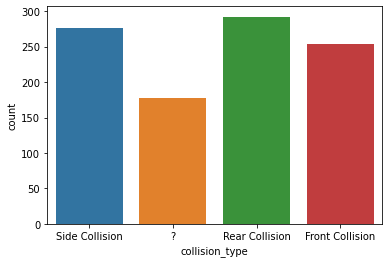

In [13]:
sns.countplot(df['collision_type'])
df['collision_type'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

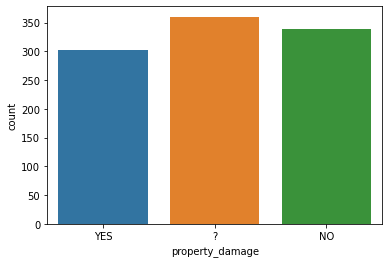

In [14]:
sns.countplot(df['property_damage'])
df['property_damage'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

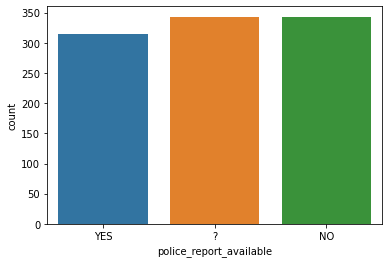

In [15]:
sns.countplot(df['police_report_available'])
df['police_report_available'].value_counts()

In [16]:
df = df.replace("?", np.NaN)

In [17]:
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [18]:
# Filling these null values
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace= True)
df['property_damage'].fillna('NO', inplace= True)
df['police_report_available'].fillna('NO', inplace= True)

In [19]:
# Statistical Summary
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [20]:
# Dropping unrequired columns
df.drop(['policy_bind_date', 'auto_year', 'policy_number','_c39','incident_date','incident_location'], axis = 1, inplace = True)

In [21]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head() 

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 299   29             2           1                  1   
1                 212   23             1           1                  2   
2                 123   10             2           0                  2   
3                 239   22             0           1                  2   
4                 212   25             0           2                  1   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                    732               1          486            1   
1                    396               5          519            1   
2                    740               5            6            0   
3                    743               6          812            0   
4                    902               6          850            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0            187           353              2   
1                     2              0           353              3   
2                     3             63           353              0   
3                     4            153            98              2   
4                     4            265           211              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            0   
1              5                         8                            0   
2              1                         7                            2   
3              0                         5                            0   
4              0                        20                            0   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0                 563           258             512            545         10   
1                  44            46              45             38          8   
2                 143           337             104            116          4   
3                 451           245             249            521          3   
4                  81            70              36             66          0   

   auto_model  fraud_reported  
0           1               1  
1          12               1  
2          30               0  
3          34               1  
4          31               0

In [22]:
# Rechecking the null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

We have no null values present in  our data.

<AxesSubplot:>

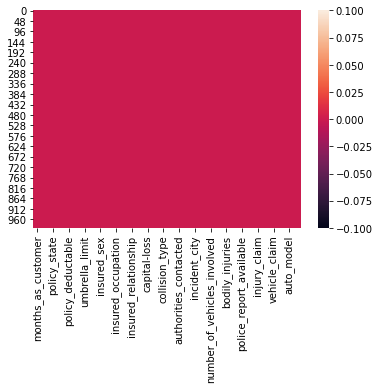

In [23]:
# Plotting heatmap
sns.heatmap(df.isnull())

In [24]:
# Checking Correlation
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.911296     -0.000783   
age                                    0.911296  1.000000     -0.014533   
policy_state                          -0.000783 -0.014533      1.000000   
policy_csl                            -0.026295 -0.015185      0.001027   
policy_deductable                      0.016873  0.020561      0.008213   
policy_annual_premium                  0.014294  0.017822      0.014751   
umbrella_limit                         0.017145  0.021924     -0.031793   
insured_zip                            0.015904  0.013517      0.025074   
insured_sex                            0.059153  0.073337     -0.020481   
insured_education_level                0.000265  0.000969     -0.034327   
insured_occupation                     0.010330  0.017220     -0.031215   
insured_hobbies                       -0.096075 -0.081315     -0.038689   
insured_relationship                   0.067755  0.074832     -0.018506   
capital-gains                         -0.002832 -0.012514      0.074460   
capital-loss                           0.015991  0.006513     -0.027070   
incident_type                         -0.014053 -0.025626      0.031848   
collision_type                        -0.068367 -0.075642      0.052438   
incident_severity                     -0.052274 -0.058439     -0.026377   
authorities_contacted                  0.004792  0.015417     -0.016777   
incident_state                         0.004622  0.005770      0.008723   
incident_city                          0.004008 -0.002291     -0.002077   
incident_hour_of_the_day               0.072231  0.087161      0.029457   
number_of_vehicles_involved            0.014040  0.022102     -0.042263   
property_damage                        0.003197 -0.003408     -0.008465   
bodily_injuries                       -0.012533 -0.015679      0.013384   
witnesses                              0.057284  0.052359      0.022960   
police_report_available               -0.020217 -0.020441      0.069017   
total_claim_amount                     0.055934  0.071265     -0.015990   
injury_claim                           0.064041  0.075124     -0.042685   
property_claim                         0.029788  0.060450      0.009282   
vehicle_claim                          0.052742  0.059784     -0.007492   
auto_make                              0.044443  0.030410      0.017124   
auto_model                             0.001095  0.017343     -0.025253   
fraud_reported                         0.017095  0.012143      0.029432   

                             policy_csl  policy_deductable  \
months_as_customer            -0.026295           0.016873   
age                           -0.015185           0.020561   
policy_state                   0.001027           0.008213   
policy_csl                     1.000000           0.001986   
policy_deductable              0.001986           1.000000   
policy_annual_premium          0.017161           0.003182   
umbrella_limit                 0.022779           0.009402   
insured_zip                    0.006474          -0.004227   
insured_sex                   -0.010757          -0.011948   
insured_education_level        0.009153           0.012000   
insured_occupation             0.015788          -0.053245   
insured_hobbies               -0.005960          -0.006006   
insured_relationship          -0.030063          -0.025468   
capital-gains                  0.002968           0.022064   
capital-loss                  -0.035136          -0.013690   
incident_type                  0.011997          -0.036759   
collision_type                 0.020641          -0.048201   
incident_severity              0.022530          -0.010001   
authorities_contacted          0.056182          -0.009862   
incident_state                 0.032814           0.010650   
incident_city                  0.009333          -0.038425   
incident_hour_of_the_day      -0.001869

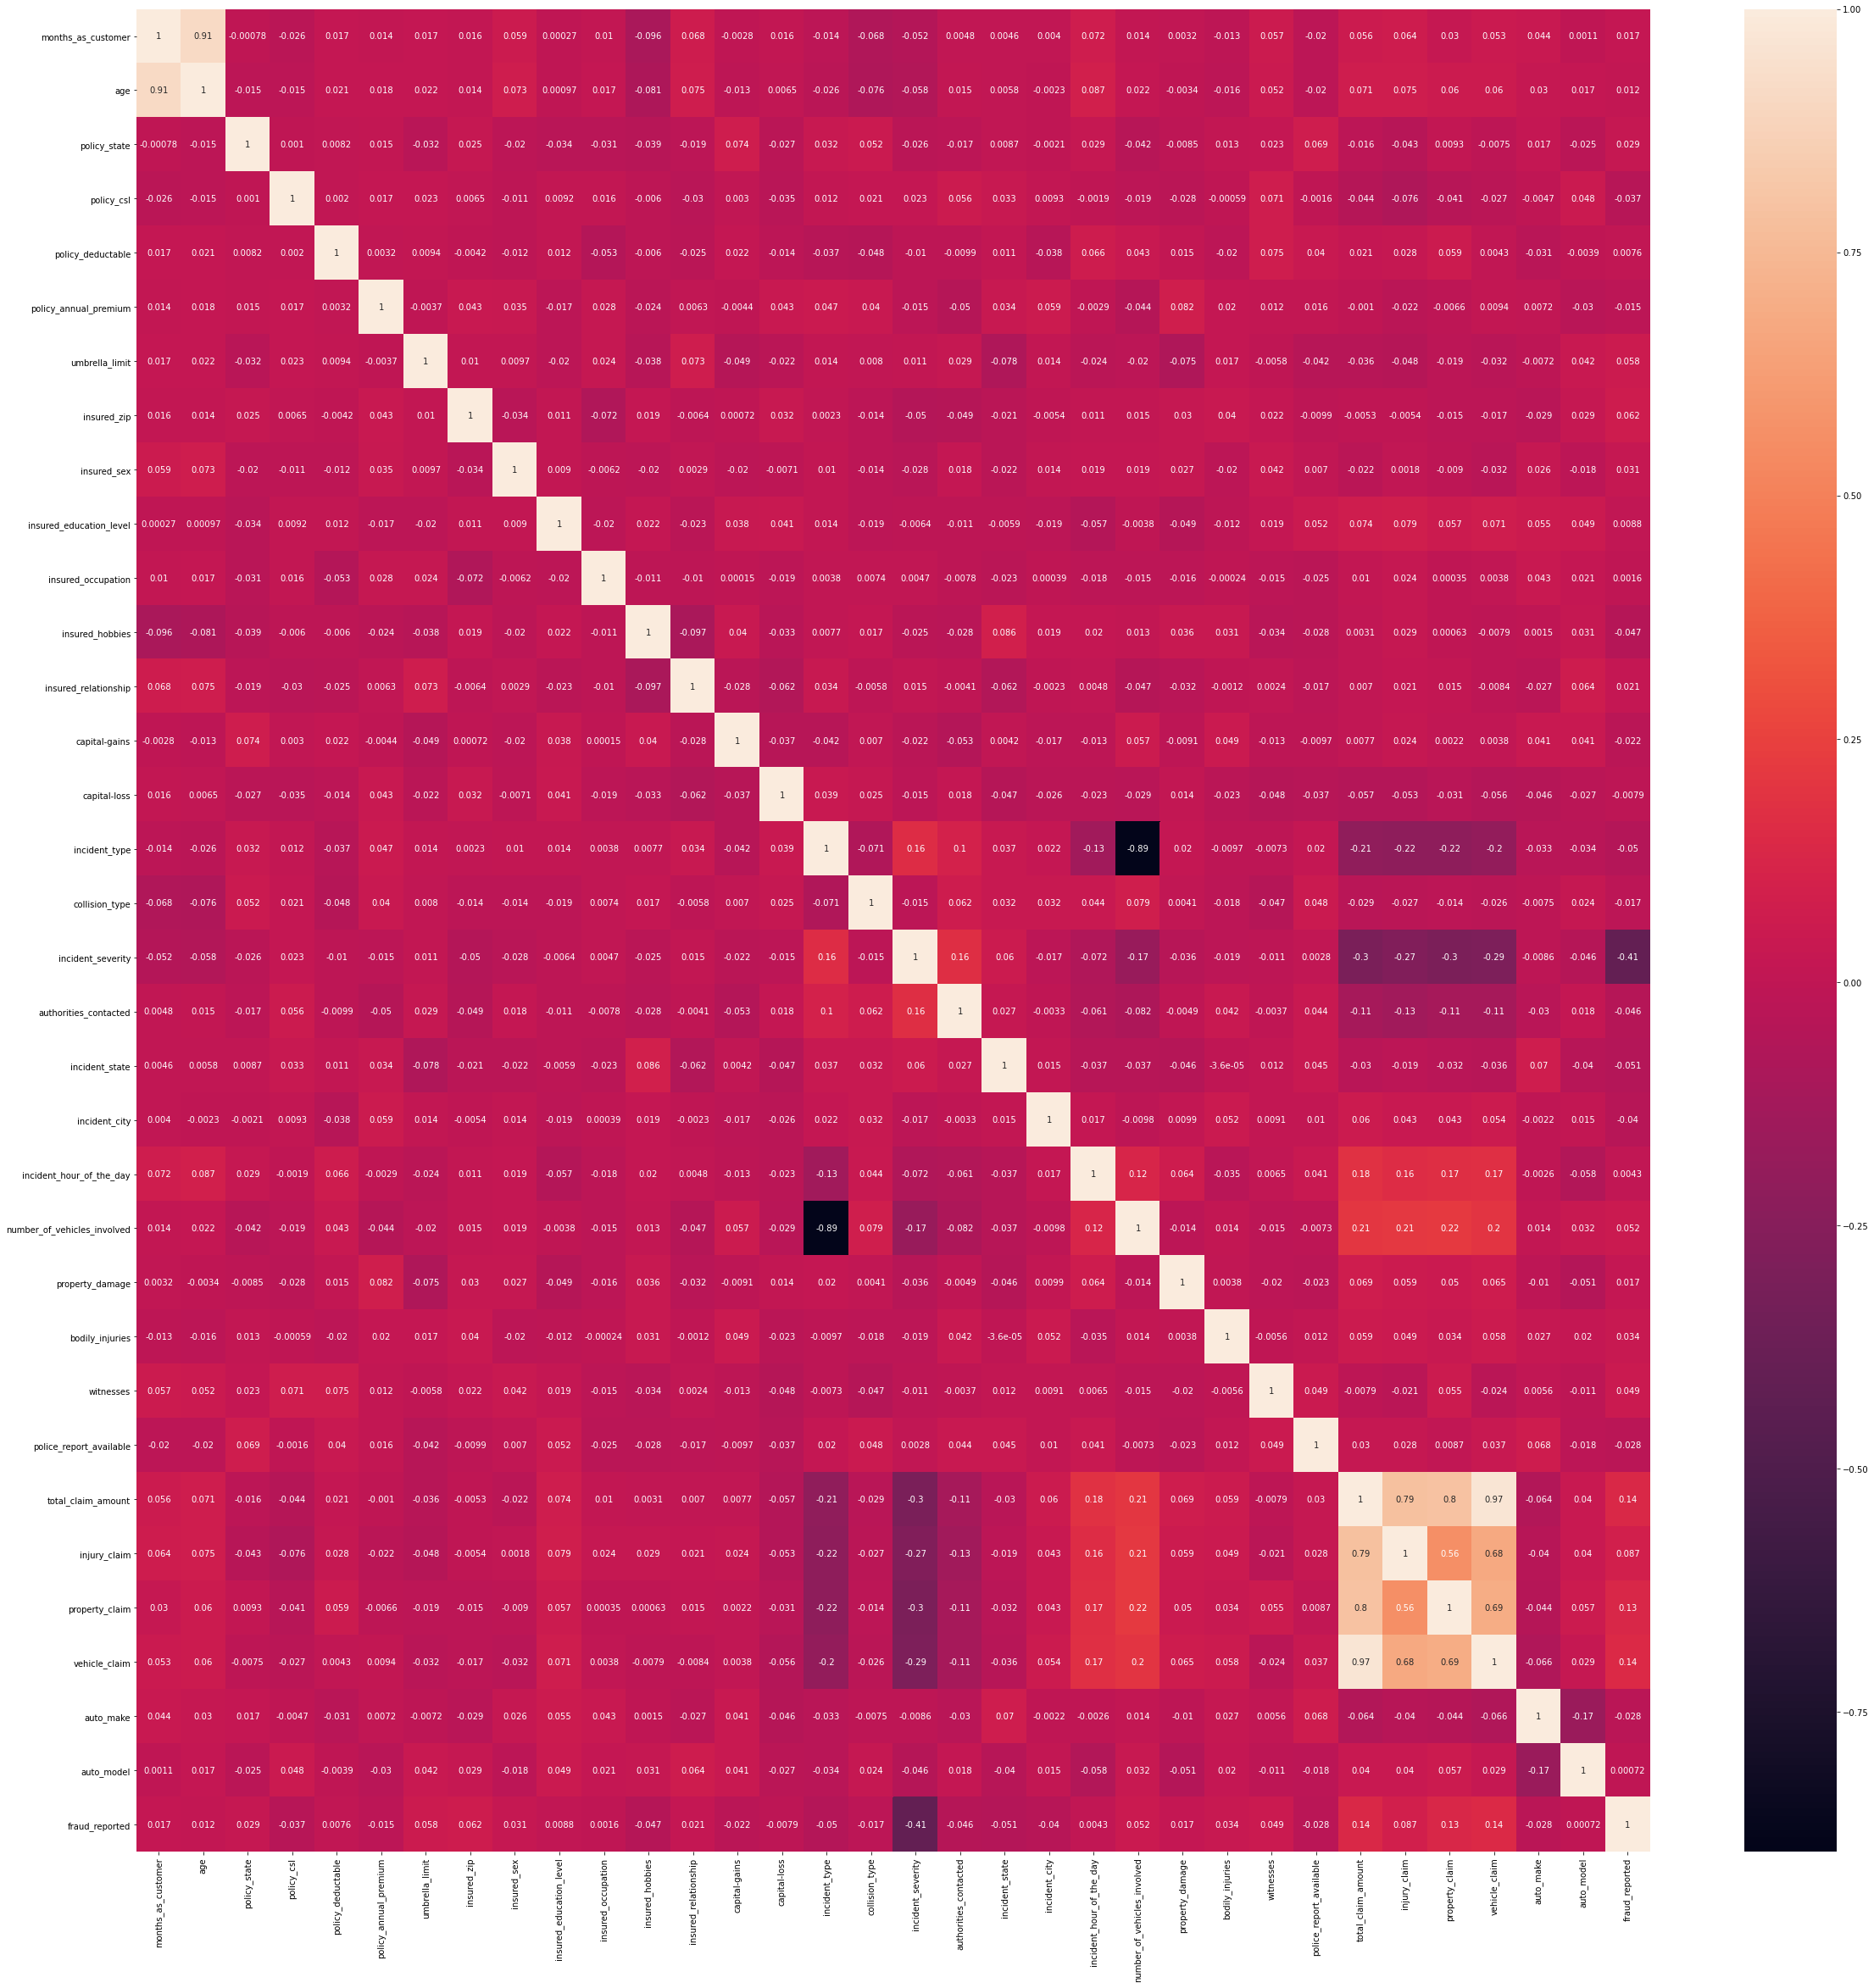

In [25]:
# Correation matrix
corr_hmap=df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_hmap,annot=True)
plt.show()

<AxesSubplot:>

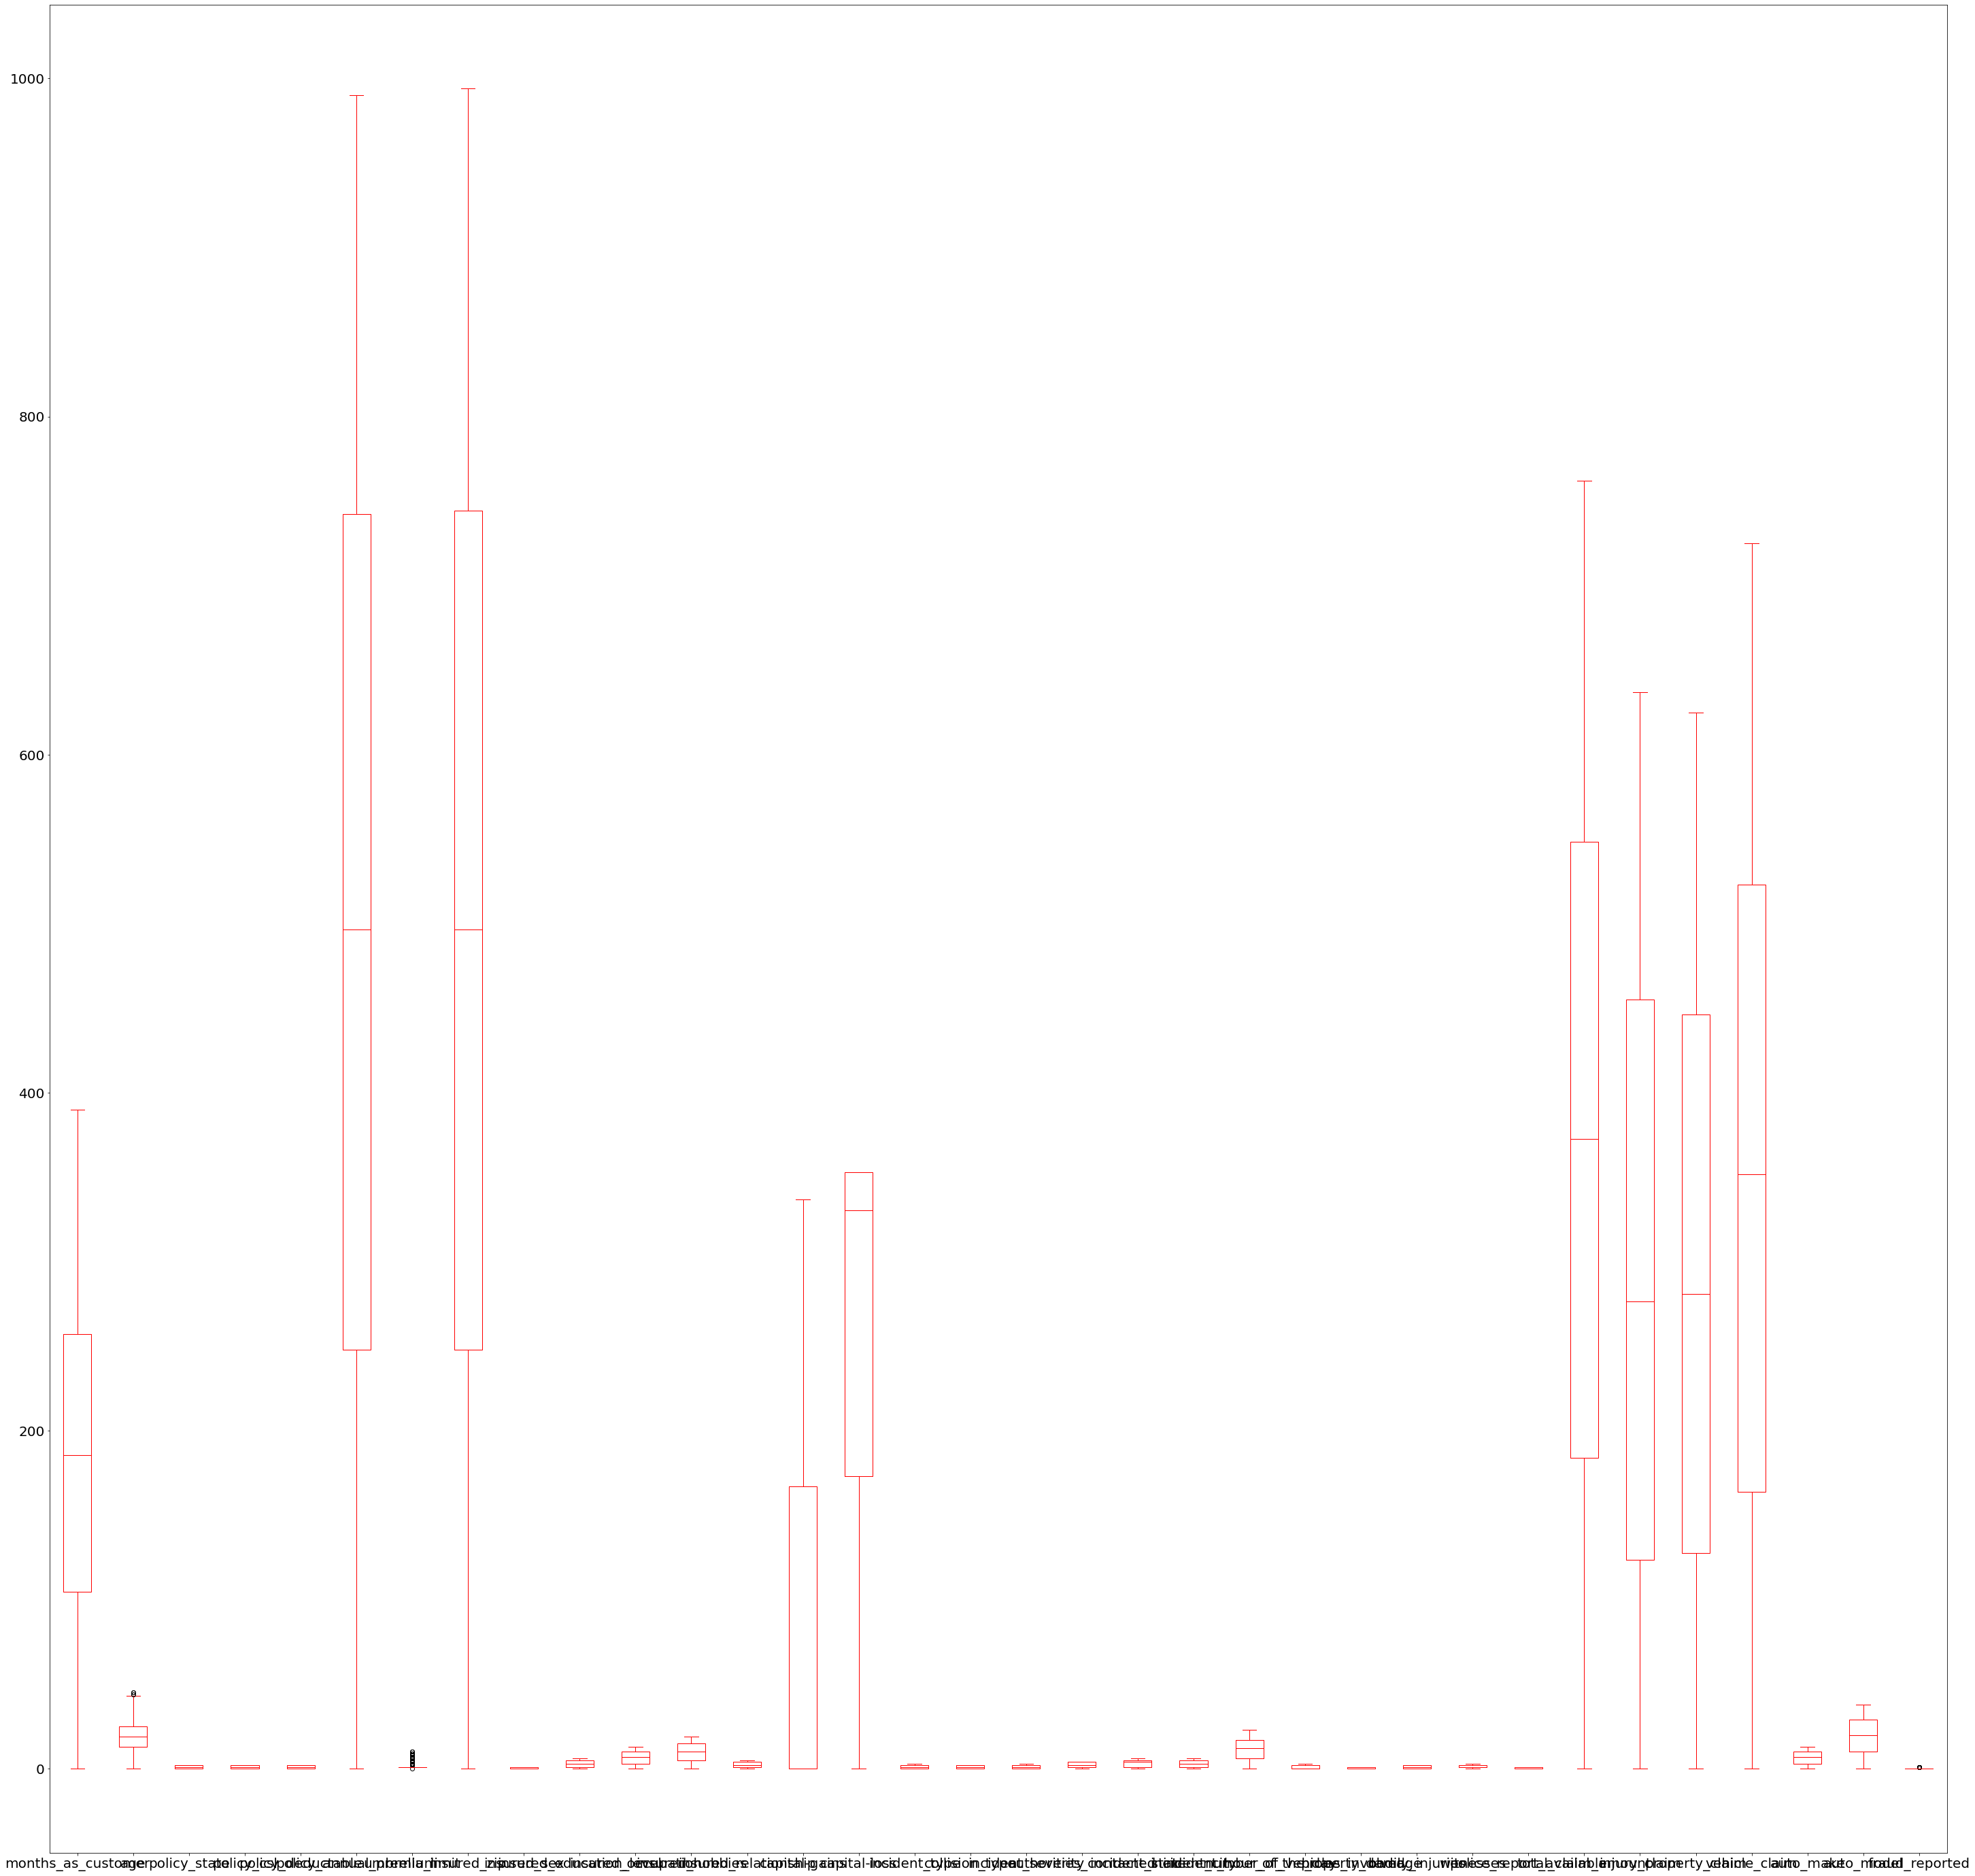

In [26]:
#Checking for skewness and outliers.
df.plot(kind = 'box',figsize =(50,50),fontsize =20 ,color ='r')

In [27]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.14895094, 0.99083647, 1.18717314, ..., 0.85646614, 1.64574255,
        1.74601919],
       [0.2776003 , 0.33407345, 0.01685641, ..., 0.36053902, 0.65747047,
        1.74601919],
       [0.6137814 , 1.08891308, 1.18717314, ..., 0.63131523, 0.95970204,
        0.57273139],
       ...,
       [0.65384349, 0.54161057, 1.18717314, ..., 1.1044297 , 0.02857005,
        0.57273139],
       [1.93016186, 2.52328351, 1.22088596, ..., 1.37520591, 1.28637088,
        0.57273139],
       [1.92014633, 2.3043625 , 1.18717314, ..., 0.36053902, 0.65747047,
        0.57273139]])

In [28]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([ 0,  1,  2, ..., 31, 32, 33], dtype=int64))


In [29]:
z[6][8]

1.0769527444706635

In [30]:
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   299   29             2           1                  1   
1                   212   23             1           1                  2   
2                   123   10             2           0                  2   
3                   239   22             0           1                  2   
4                   212   25             0           2                  1   
5                   239   20             2           1                  1   
6                   126   15             1           1                  1   
7                   153   18             0           0                  1   
8                    24   14             0           0                  0   
9                   198   23             0           0                  0   
10                  219   23             2           0                  0   
11                  371   42             2           0                  2   
12                   52    4             2           2                  0   
13                  110   15             2           0                  1   
14                  167   19             2           1                  2   
15                  386   39             1           0                  2   
16                   61    7             2           2                  1   
17                  128   12             1           2                  0   
18                  148   18             2           2                  0   
19                  182   20             1           2                  2   
20                  378   43             1           1                  1   
21                  203   22             0           2                  2   
22                  322   36             0           0                  2   
23                  349   36             1           0                  2   
24                  221   21             1           0                  1   
25                    8   16             2           0                  2   
26                  240   24             1           0                  2   
27                  188   15             1           0                  0   
28                  209   21             2           0                  2   
29                  225   26             0           2                  2   
30                   56    6             0           1                  1   
32                  143   16             0           2                  1   
33                  103   11             0           0                  1   
34                  137   18             0           2                  0   
35                  135   14             2           0                  1   
36                   54    9             0           0                  1   
37                  270   30             0           2                  2   
38                  361   35             1           2                  2   
39                  185   18             1           1                  0   
40                   68    7             0           0                  0   
41                  105   15             1           1                  0   
42                   33    4             0           2                  0   
43                   95   11             2           1                  0   
44                  250   25             0           0                  2   
45                  247   21             0           1                  1   
46                  151   14             1           0                  0   
47                  314   28             2           2                  2   
49                  178   16             0           0                  1   
50                  360   40             2           1                  2   
51                   80    8             0           0                  2   
52                  203   20             1           0                  1   
5

In [31]:
df_new.shape

(985, 34)

In [32]:
# Checking the percentage of loss data
loss_percent =(1000-985)/1000*100
print(loss_percent)

1.5


After the removal of outliers, we have lost 1.5 % of our data.

In [34]:
# Checking Skewness
df_new.skew()

months_as_customer             0.096656
age                            0.480506
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.060667
policy_annual_premium         -0.001693
umbrella_limit                 1.902038
insured_zip                    0.005475
insured_sex                    0.144759
insured_education_level        0.004685
insured_occupation            -0.052412
insured_hobbies               -0.061536
insured_relationship           0.077333
capital-gains                  0.880109
capital-loss                  -0.807319
incident_type                  0.091063
collision_type                -0.032563
incident_severity              0.281858
authorities_contacted         -0.113349
incident_state                -0.151360
incident_city                  0.045660
incident_hour_of_the_day      -0.034538
number_of_vehicles_involved    0.509302
property_damage                0.861044
bodily_injuries                0.005614


In [35]:
# Removing skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[['umbrella_limit','capital-gains','property_damage','police_report_available']] = scaler.fit_transform(df[['umbrella_limit','capital-gains','property_damage','police_report_available']].values)

In [37]:
# Spliting target variable and independent variables
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [38]:
# Scaling the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

months_as_customer       age  policy_state  policy_csl  \
0              1.148951  0.990836      1.187173    0.060937   
1              0.277600  0.334073     -0.016856    0.060937   
2             -0.613781 -1.088913      1.187173   -1.182668   
3              0.548019  0.224613     -1.220886    0.060937   
4              0.277600  0.552994     -1.220886    1.304542   
5              0.548019  0.005692      1.187173    0.060937   
6             -0.583735 -0.541611     -0.016856    0.060937   
7             -0.313316 -0.213229     -1.220886   -1.182668   
8             -1.605318 -0.651071     -1.220886   -1.182668   
9              0.137383  0.334073     -1.220886   -1.182668   
10             0.347709  0.334073      1.187173   -1.182668   
11             1.870069  2.413823      1.187173   -1.182668   
12            -1.324884 -1.745676      1.187173    1.304542   
13            -0.743983 -0.541611      1.187173   -1.182668   
14            -0.173098 -0.103769      1.187173    0.060937   
15             2.020302  2.085441     -0.016856   -1.182668   
16            -1.234744 -1.417295      1.187173    1.304542   
17            -0.563704 -0.869992     -0.016856    1.304542   
18            -0.363393 -0.213229      1.187173    1.304542   
19            -0.022865  0.005692     -0.016856    1.304542   
20             1.940177  2.523284     -0.016856    0.060937   
21             0.187461  0.224613     -1.220886    1.304542   
22             1.379308  1.757060     -1.220886   -1.182668   
23             1.649727  1.757060     -0.016856   -1.182668   
24             0.367740  0.115152     -0.016856   -1.182668   
25            -1.765567 -0.432150      1.187173   -1.182668   
26             0.558035  0.443534     -0.016856   -1.182668   
27             0.037228 -0.541611     -0.016856   -1.182668   
28             0.247554  0.115152      1.187173   -1.182668   
29             0.407802  0.662455     -1.220886    1.304542   
30            -1.284822 -1.526755     -1.220886    0.060937   
31            -0.303300 -0.213229     -1.220886   -1.182668   
32            -0.413471 -0.432150     -1.220886    1.304542   
33            -0.814092 -0.979453     -1.220886   -1.182668   
34            -0.473564 -0.213229     -1.220886    1.304542   
35            -0.493595 -0.651071      1.187173   -1.182668   
36            -1.304853 -1.198374     -1.220886   -1.182668   
37             0.858501  1.100297     -1.220886    1.304542   
38             1.769913  1.647599     -0.016856    1.304542   
39             0.007181 -0.213229     -0.016856    0.060937   
40            -1.164635 -1.417295     -1.220886   -1.182668   
41            -0.794061 -0.541611     -0.016856    0.060937   
42            -1.515179 -1.745676     -1.220886    1.304542   
43            -0.894216 -0.979453      1.187173    0.060937   
44             0.658190  0.552994     -1.220886   -1.182668   
45             0.628144  0.115152     -1.220886    0.060937   
46            -0.333347 -0.651071     -0.016856   -1.182668   
47             1.299184  0.881376      1.187173    1.304542   
48            -0.223176 -0.541611     -0.016856    1.304542   
49            -0.062928 -0.432150     -1.220886   -1.182668   
50             1.759898  2.194902      1.187173    0.060937   
51            -1.044449 -1.307834     -1.220886   -1.182668   
52             0.187461  0.005692     -0.016856   -1.182668   
53             0.237538  0.115152     -0.016856   -1.182668   
54            -0.032881  0.005692      1.187173    0.060937   
55            -1.645380 -1.417295      1.187173   -1.182668   
56             1.830007  1.866520     -0.016856    0.060937   
57            -1.014402 -0.760532     -0.016856    1.304542   
58            -1.735520  0.005692     -1.220886    0.060937   
59            -0.453533 -0.322690      1.187173    0.060937   
60            -0.423486 -0.541611     -0.016856   -1.182668   
61             0.447864  0.552994     -1.220886    1.304542   
62            -0.764014 -0.760532   

In [39]:
maxAccu = 0
maxRS = 0
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy is ", maxAccu, " on Random_state", maxRS)

Best accuracy is  0.8291666666666667  on Random_state 137


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=maxRS)

In [41]:
x_train.shape

(760, 33)

In [42]:
y_train.shape

(760,)

In [43]:
x_test.shape

(240, 33)

In [44]:
y_test.shape

(240,)

In [45]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.1868134715235048


In [46]:
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))


MSE: 0.14168976004367825
MAE: 0.3088437477408147
r2_score: -3.2202603182324347


In [47]:
# USING LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [49]:
from sklearn import metrics
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.009385866682383837
MSE: 0.1713152123730379
MAE: 0.36206140350877203
RMSE: 0.41390241890213436


In [50]:
# USING SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.1654392413504171
MSE: 0.14164350653747085
MAE: 0.3101422735577479
RMSE: 0.3763555586642382


In [51]:
# USING RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'sparse_cg'}


In [52]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.1664647724066396
MSE: 0.14146945112765089
MAE: 0.3094154770198675
RMSE: 0.37612424958735496


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7986842105263158
Testing accuracy : 0.7958333333333333
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       188
           1       0.54      0.37      0.44        52

    accuracy                           0.80       240
   macro avg       0.69      0.64      0.66       240
weighted avg       0.77      0.80      0.78       240

[[172  16]
 [ 33  19]]


In [54]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8


In [55]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       188
           1       0.53      0.69      0.60        52

    accuracy                           0.80       240
   macro avg       0.72      0.76      0.73       240
weighted avg       0.83      0.80      0.81       240

[[156  32]
 [ 16  36]]


In [56]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8041666666666667


In [57]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       188
           1       0.56      0.48      0.52        52

    accuracy                           0.80       240
   macro avg       0.71      0.69      0.70       240
weighted avg       0.80      0.80      0.80       240

[[168  20]
 [ 27  25]]


In [58]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 0.161596, 0.015991
R   : 0.161507, 0.015930
svr   : 0.192529, 0.025988
svr_p   : 0.194575, 0.037460
svr_r   : 0.175103, 0.027193
RF   : 0.117034, 0.023216
DTR   : 0.228000, 0.031559
GBR   : 0.119774, 0.023591


In [59]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [60]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [61]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [62]:
rf_randomized.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [63]:
rf_final=rf_randomized.best_estimator_

In [64]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 80 %

In [65]:
# AUC ROC
auc = roc_auc_score(y_test, y_pred)
auc

0.6871931260229133

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [67]:
fpr

array([0.        , 0.10638298, 1.        ])

In [68]:
tpr

array([0.        , 0.48076923, 1.        ])

In [69]:
thresholds

array([2, 1, 0])

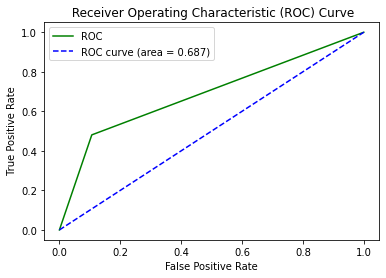

In [70]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='green',label='ROC')
plt.plot([0, 1],[0, 1], color='blue', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [73]:
# Saving The model
import pickle
file = 'INSURANCE CLAIM PREDICTION.pkl'
#save file
save = pickle.dump(RandomForestClassifier,open(file,'wb'))

In [72]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

original  predicted
0           0          0
1           1          0
2           0          0
3           0          0
4           0          0
5           0          0
6           1          0
7           0          0
8           0          0
9           0          0
10          0          0
11          0          0
12          0          0
13          0          1
14          0          0
15          0          0
16          0          0
17          1          1
18          0          0
19          0          0
20          0          0
21          1          0
22          0          1
23          1          0
24          0          0
25          0          0
26          1          0
27          0          0
28          0          0
29          0          1
30          0          0
31          0          0
32          1          0
33          0          0
34          1          1
35          1          0
36          0          0
37          0          0
38          0          0
39          0          0
40          0          0
41          0          0
42          0          0
43          0          0
44          1          0
45          1          1
46          0          0
47          0          0
48          0          0
49          1          1
50          0          0
51          1          1
52          1          1
53          0          0
54          1          0
55          1          0
56          0          0
57          0          0
58          0          0
59          0          1
60          0          0
61          1          0
62          0          0
63          0          0
64          0          0
65          0          0
66          0          0
67          0          0
68          0          0
69          0          0
70          1          1
71          0          1
72          1          1
73          0          0
74          0          0
75          1          0
76          1          0
77          0          0
78          0          0
79          0          0
80          0          0
81          0          0
82          0          0
83          0          1
84          0          0
85          0          0
86          0          0
87          0          0
88          0          0
89          0          0
90          0          0
91          1          0
92          0          0
93          0          0
94          1          0
95          0          0
96          0          0
97          0          0
98          0          1
99          0          0
100         1          0
101         0          0
102         1          1
103         0          0
104         0          0
105         0          0
106         0          0
107         0          0
108         0          0
109         0          0
110         1          0
111         0          1
112         0          0
113         0          0
114         0          0
115         0          0
116         0          1
117         0          1
118         0          0
119         0          0
120         1          1
121         0          0
122         1          0
123         0          0
124         0          0
125         0          0
126         0          0
127         0          0
128         0          0
129         0          1
130         0          0
131         0          0
132         0          0
133         0          0
134         0          0
135         0          0
136         1          0
137         0          0
138         0          0
139         1          1
140         0          0
141         0          0
142         0          0
143         0          0
144         1          0
145         0          0
146         0          0
147         0          0
148         0          0
149         0          0
150         1          0
151         0          0
152         0          0
153         0          0
154         1          0
155         0          0
156         0          0
157         1          0
158         0          0
159  